In [1]:
from roi import equity, external, utilities, macro, metrics, cost, surveys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
bls_api_key = "c8803d0ba66c4592b8b0eff68ac9ebb0"

In [3]:
data = pd.read_csv("testing/testing-data/test_microdata.csv")

In [4]:
programs = pd.read_csv("testing/testing-data/programs.csv")

In [5]:
data.columns

Index(['Unnamed: 0', 'race', 'gender', 'earnings_start', 'earnings_end', 'age',
       'program', 'program_start', 'program_end', 'education_level',
       'completer', 'employed_at_end', 'employed_at_start', 'state',
       'full_address', 'Address', 'City', 'State', 'Zip', 'id', 'start_month',
       'end_month'],
      dtype='object')

__Equity analysis__

In [6]:
gini = equity.Gini.from_dataframe(data, 'gender', 'earnings_end', sample = 2000)
gini.calculate()

/Users/mattlerner/roi/sbir-roi/roi/equity.py:77: UserWarning: When sample == True, Metric() will use the value of sample to create a random subset of values that it will use for all calculations. This number will be stored as attribute .samplesize.
  warnings.warn("When sample == True, Metric() will use the value of sample to create a random subset of values that it will use for all calculations. This number will be stored as attribute .samplesize.")
/Users/mattlerner/roi/sbir-roi/roi/equity.py:61: UserWarning: Data passed contains 99 NA values. All equity metrics are calculated by ignoring NA values, in effect dropping them. Please ensure that you have a strategy for dealing with these missing values. If values are not missing at random, e.g. if individuals with missing values have common traits, then ALL METRICS calculated will be biased.
  warnings.warn("Data passed contains {} NA values. All equity metrics are calculated by ignoring NA values, in effect dropping them. Please ensure

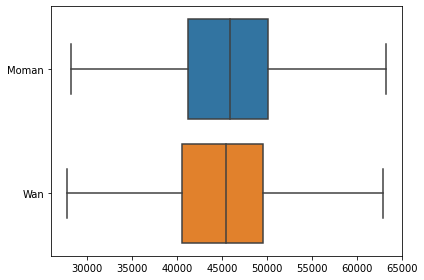

In [7]:
gini.viz

In [8]:
gini.ratio

0.040085275754218136

In [9]:
gini.sample

2000

__Geocode addresses__

In [10]:
small_data = data.sample(30)

In [11]:
small_data.head()

,Unnamed: 0,race,gender,earnings_start,earnings_end,age,program,program_start,program_end,education_level,...,employed_at_start,state,full_address,Address,City,State,Zip,id,start_month,end_month
7788,7789,Earthling,Moman,26938.000,52076.000,40,French Literature,2015,2018,123,...,1,8,5523 W IRVING PARK ROAD CHICAGO IL 60641,5523 W IRVING PARK ROAD,CHICAGO,IL,60641,6583,8,7
2886,2887,Earthling,Wan,29235.000,37817.000,25,Biology,2013,2016,73,...,1,8,"150 GRAND TRUNK AVENUE SW, SUITE 1 HARTVILLE O...","150 GRAND TRUNK AVENUE SW, SUITE 1",HARTVILLE,OH,44632,7069,9,6
10172,10173,Neptunian,Moman,32842.000,23072.000,23,Philosophy,2013,2017,125,...,1,8,"8435 KEYSTONE CROSSING, SUITE 108 INDIANAPOLIS...","8435 KEYSTONE CROSSING, SUITE 108",INDIANAPOLIS,IN,46240,9444,9,7
4465,4466,Martian,Moman,26742.000,41086.000,34,Philosophy,2012,2013,81,...,0,8,3350 TOWNSHIP LINE ROAD DREXEL HILL PA 19026,3350 TOWNSHIP LINE ROAD,DREXEL HILL,PA,19026,1245,8,6
7894,7895,Earthling,Wan,32330.000,40945.000,55,Philosophy,2012,2012,123,...,1,8,23157 INTERSTATE 30 BRYANT AR 72022,23157 INTERSTATE 30,BRYANT,AR,72022,9106,10,5


In [12]:
small_data['geocode'] = external.Census.get_batch_geocode(small_data)

Successfully geocoded 66.67% of 30 passed addresses.
Of successfully matched addresses, 70.0% were exact matches


__Get SES for each individual with a geocode__

In [13]:
adi = equity.ADI()

In [14]:
small_data['ses'] = adi.get_quintile_for_geocodes_frame(small_data, 'geocode')

Geocode merge: Merged 20 of 30 observations in input dataframe (66.67%)


In [15]:
small_data.head()

,Unnamed: 0,race,gender,earnings_start,earnings_end,age,program,program_start,program_end,education_level,...,full_address,Address,City,State,Zip,id,start_month,end_month,geocode,ses
7788,7789,Earthling,Moman,26938.000,52076.000,40,French Literature,2015,2018,123,...,5523 W IRVING PARK ROAD CHICAGO IL 60641,5523 W IRVING PARK ROAD,CHICAGO,IL,60641,6583,8,7,,NaN
2886,2887,Earthling,Wan,29235.000,37817.000,25,Biology,2013,2016,73,...,"150 GRAND TRUNK AVENUE SW, SUITE 1 HARTVILLE O...","150 GRAND TRUNK AVENUE SW, SUITE 1",HARTVILLE,OH,44632,7069,9,6,,NaN
10172,10173,Neptunian,Moman,32842.000,23072.000,23,Philosophy,2013,2017,125,...,"8435 KEYSTONE CROSSING, SUITE 108 INDIANAPOLIS...","8435 KEYSTONE CROSSING, SUITE 108",INDIANAPOLIS,IN,46240,9444,9,7,180973202022,20-40
4465,4466,Martian,Moman,26742.000,41086.000,34,Philosophy,2012,2013,81,...,3350 TOWNSHIP LINE ROAD DREXEL HILL PA 19026,3350 TOWNSHIP LINE ROAD,DREXEL HILL,PA,19026,1245,8,6,420454011044,0-20
7894,7895,Earthling,Wan,32330.000,40945.000,55,Philosophy,2012,2012,123,...,23157 INTERSTATE 30 BRYANT AR 72022,23157 INTERSTATE 30,BRYANT,AR,72022,9106,10,5,,NaN


__Check out SES equity concerns__

In [16]:
theil_t = equity.Theil_T.from_dataframe(small_data, 'ses', 'earnings_end')

/Users/mattlerner/roi/sbir-roi/roi/equity.py:61: UserWarning: Data passed contains 5 NA values. All equity metrics are calculated by ignoring NA values, in effect dropping them. Please ensure that you have a strategy for dealing with these missing values. If values are not missing at random, e.g. if individuals with missing values have common traits, then ALL METRICS calculated will be biased.
  warnings.warn("Data passed contains {} NA values. All equity metrics are calculated by ignoring NA values, in effect dropping them. Please ensure that you have a strategy for dealing with these missing values. If values are not missing at random, e.g. if individuals with missing values have common traits, then ALL METRICS calculated will be biased.".format(self.nans))


In [17]:
theil_t.calculate()

/Users/mattlerner/roi/sbir-roi/roi/equity.py:133: RuntimeWarning: Mean of empty slice
  mu = np.nanmean(x)
/Users/mattlerner/roi/sbir-roi/roi/equity.py:153: RuntimeWarning: Mean of empty slice
  x_i_bar = np.nanmean(array)
/Users/mattlerner/roi/sbir-roi/roi/equity.py:189: RuntimeWarning: Mean of empty slice
  x_i = np.array([np.nanmean(group) for group in list_of_groups])


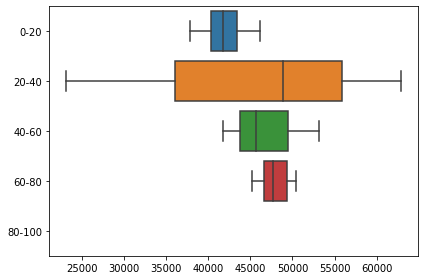

In [18]:
theil_t.viz

In [19]:
theil_t.ratio

0.25280199204496134

__Calculate graduate wage summary statistics__

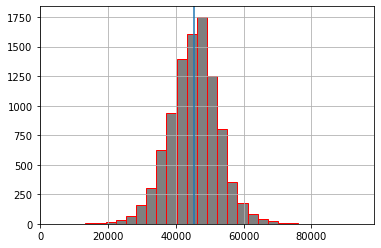

In [20]:
fig, ax = plt.subplots()
data['earnings_end'].hist(ax=ax, edgecolor="red", fc=(0, 0, 0, 0.5), bins=30)
plt.axvline(x=np.mean(data['earnings_end']))

In [21]:
utilities.multiple_describe(data, 'program', 'earnings_end')

,program,n,mean,median,sd,min,max
0,Anthropology,1494.000,44639.437,44741.500,6753.785,6862.000,67561.000
1,Art History,1444.000,45643.767,46205.000,6569.827,17333.000,94136.000
2,Biology,1358.000,44965.921,45574.000,7305.916,19947.000,73508.000
3,Economics,1451.000,46064.692,46641.000,7555.190,13759.000,75326.000
4,Electrical Engineering,1495.000,45717.226,45878.000,7653.728,10667.000,70035.000
5,French Literature,1387.000,44657.446,44871.000,7048.111,4272.000,80934.000
6,Philosophy,1549.000,45563.126,45553.000,8306.679,9972.000,85146.000


__Adjust wages for inflation__

In [22]:
bls = macro.BLS_Ops()
data['earnings_end_adjusted'] = bls.adjust_to_current_dollars(data, 'program_end', 'earnings_end')

Latest CPI year in provided BLS data is 2018.0: All dollars being adjusted to 2018.0 dollars.
Years in provided dataframe for which there is no data in the provided CPI frame:

{2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026}


/Users/mattlerner/roi/sbir-roi/roi/macro.py:58: UserWarning: Value column earnings_end contains 509 NA values (5.0%) of total.
  warnings.warn("Value column {} contains {} NA values ({}%) of total.".format(value_column_name, value_nas, round(100*value_nas/len(frame_),2)))
/Users/mattlerner/roi/sbir-roi/roi/macro.py:71: UserWarning: 2047 rows in column program_end could not be merged with provided CPI data. Please note that (1) the BLS API provides only up to 20 years of data; if you want to use more, you will have to manually combine multiple queries. (2) We do not recommend using more than ten years of historical data in calculations.
  warnings.warn("{} rows in column {} could not be merged with provided CPI data. Please note that (1) the BLS API provides only up to 20 years of data; if you want to use more, you will have to manually combine multiple queries. (2) We do not recommend using more than ten years of historical data in calculations.".format(unmerged_len, year_column_name))

In [23]:
data[['program_end','earnings_end','earnings_end_adjusted']].sample(10)

,program_end,earnings_end,earnings_end_adjusted
2346,2018,37729.000,37729.000
9643,2017,42417.000,43451.823
2006,2019,46985.000,nan
7952,2015,51177.000,54221.613
6885,2016,38123.000,39888.214
6230,2017,38889.000,39837.752
6061,2022,51814.000,nan
6644,2022,43048.000,nan
5296,2013,45974.000,49555.912
6203,2017,39251.000,40208.584


__Recalculate average graduate wage by program__

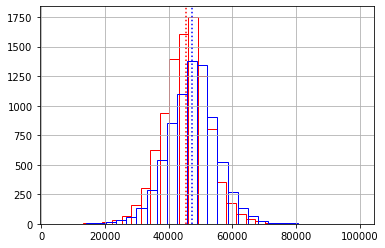

In [24]:
fig, ax = plt.subplots()

# unadjusted
data['earnings_end'].hist(ax=ax, edgecolor="red", fc=(0, 0, 0, 0), bins=30)
plt.axvline(x=np.mean(data['earnings_end']), color="red", linestyle=":")

# adjusted
data['earnings_end_adjusted'].hist(ax=ax, edgecolor="blue", fc=(0, 0, 0, 0), bins=30)
plt.axvline(x=np.mean(data['earnings_end_adjusted']), color="blue", linestyle=":")

__Calculate earnings premium - Simple way__

In [25]:
data['earnings_change'] = data['earnings_end'] - data['earnings_start']

In [26]:
utilities.multiple_describe(data, 'program', 'earnings_change')

,program,n,mean,median,sd,min,max
0,Anthropology,1494.000,9620.091,9776.000,7012.515,-24859.000,40803.000
1,Art History,1444.000,10332.517,9971.000,7061.107,-24181.000,78852.000
2,Biology,1358.000,9937.525,9719.000,7014.123,-23028.000,43846.000
3,Economics,1451.000,10610.721,10666.500,7182.989,-32282.000,56690.000
4,Electrical Engineering,1495.000,10172.111,10131.500,7097.846,-28112.000,50351.000
5,French Literature,1387.000,9900.158,9994.500,7217.218,-30161.000,49783.000
6,Philosophy,1549.000,10381.342,10150.000,8099.393,-30166.000,52950.000


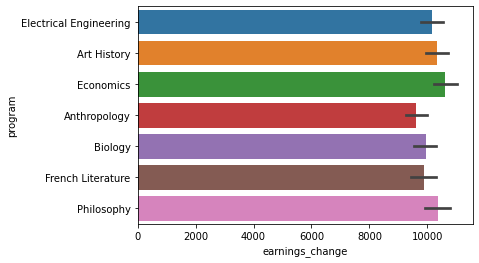

In [27]:
sns.barplot(x="earnings_change", y="program", data=data, estimator=np.mean)

__Calculate earnings premium - Fancy way__

In [28]:
data

,Unnamed: 0,race,gender,earnings_start,earnings_end,age,program,program_start,program_end,education_level,...,full_address,Address,City,State,Zip,id,start_month,end_month,earnings_end_adjusted,earnings_change
0,1,Martian,Wan,26340.000,37403.000,18,Electrical Engineering,2014,2016,0,...,"2 SOUTH GOLD DRIVE, SUITE B HAMILTON NJ 8691","2 SOUTH GOLD DRIVE, SUITE B",HAMILTON,NJ,8691,9630,10,5,39134.876,11063.000
1,2,Martian,Wan,27562.000,37011.000,43,Electrical Engineering,2015,2017,0,...,"225 WATER STREET, SUITE C-101 PLYMOUTH MA 2360","225 WATER STREET, SUITE C-101",PLYMOUTH,MA,2360,4927,9,6,37913.936,9449.000
2,3,Martian,Wan,26641.000,36806.000,57,Electrical Engineering,2013,2013,0,...,"963 EAST STUART DRIVE, SUITE 1 GALAX VA 24333","963 EAST STUART DRIVE, SUITE 1",GALAX,VA,24333,3063,9,5,39673.618,10165.000
3,4,Martian,Wan,25812.000,37242.000,33,Electrical Engineering,2010,2011,0,...,5922 18TH AVENUE BROOKLYN NY 11204,5922 18TH AVENUE,BROOKLYN,NY,11204,9203,9,6,41576.535,11430.000
4,5,Martian,Wan,25581.000,37408.000,47,Electrical Engineering,2011,2012,0,...,1675 RANGE ST BOULDER CO 80301,1675 RANGE ST,BOULDER,CO,80301,1136,10,5,40913.638,11827.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10173,10174,Neptunian,Moman,26840.000,32819.000,20,Philosophy,2015,2019,125,...,315 1ST STREET SOUTH REFORM AL 35481,315 1ST STREET SOUTH,REFORM,AL,35481,4515,9,5,nan,5979.000
10174,10175,Neptunian,Moman,16577.000,69527.000,47,Philosophy,2015,2019,125,...,4310 AUSTIN STREET HOUSTON TX 77004,4310 AUSTIN STREET,HOUSTON,TX,77004,1306,9,6,nan,52950.000
10175,10176,Neptunian,Moman,nan,28739.000,60,Philosophy,2018,2020,125,...,101 EAST CORPORATE DRIVE SUITE #210 LEWISVILLE...,101 EAST CORPORATE DRIVE SUITE #210,LEWISVILLE,TX,75067,6718,8,7,nan,nan
10176,10177,Neptunian,Moman,nan,39994.000,55,Philosophy,2016,2018,125,...,812 NEWTOWN ROAD VIRGINIA BEACH VA 23462,812 NEWTOWN ROAD,VIRGINIA BEACH,VA,23462,5574,9,6,39994.000,nan


In [29]:
data['year_month_entry'] = data['program_start'].astype(str) + '-' + data['start_month'].astype(str).str.zfill(2)
data['year_month_exit'] = data['program_end'].astype(str) + '-' + data['end_month'].astype(str).str.zfill(2)

In [30]:
data

,Unnamed: 0,race,gender,earnings_start,earnings_end,age,program,program_start,program_end,education_level,...,City,State,Zip,id,start_month,end_month,earnings_end_adjusted,earnings_change,year_month_entry,year_month_exit
0,1,Martian,Wan,26340.000,37403.000,18,Electrical Engineering,2014,2016,0,...,HAMILTON,NJ,8691,9630,10,5,39134.876,11063.000,2014-10,2016-05
1,2,Martian,Wan,27562.000,37011.000,43,Electrical Engineering,2015,2017,0,...,PLYMOUTH,MA,2360,4927,9,6,37913.936,9449.000,2015-09,2017-06
2,3,Martian,Wan,26641.000,36806.000,57,Electrical Engineering,2013,2013,0,...,GALAX,VA,24333,3063,9,5,39673.618,10165.000,2013-09,2013-05
3,4,Martian,Wan,25812.000,37242.000,33,Electrical Engineering,2010,2011,0,...,BROOKLYN,NY,11204,9203,9,6,41576.535,11430.000,2010-09,2011-06
4,5,Martian,Wan,25581.000,37408.000,47,Electrical Engineering,2011,2012,0,...,BOULDER,CO,80301,1136,10,5,40913.638,11827.000,2011-10,2012-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10173,10174,Neptunian,Moman,26840.000,32819.000,20,Philosophy,2015,2019,125,...,REFORM,AL,35481,4515,9,5,nan,5979.000,2015-09,2019-05
10174,10175,Neptunian,Moman,16577.000,69527.000,47,Philosophy,2015,2019,125,...,HOUSTON,TX,77004,1306,9,6,nan,52950.000,2015-09,2019-06
10175,10176,Neptunian,Moman,nan,28739.000,60,Philosophy,2018,2020,125,...,LEWISVILLE,TX,75067,6718,8,7,nan,nan,2018-08,2020-07
10176,10177,Neptunian,Moman,nan,39994.000,55,Philosophy,2016,2018,125,...,VIRGINIA BEACH,VA,23462,5574,9,6,39994.000,nan,2016-09,2018-06


In [31]:
data['macro_wage_change'] = bls.wage_change(data, 'State','year_month_entry','year_month_exit')

/Users/mattlerner/roi/sbir-roi/roi/macro.py:202: UserWarning: Series passed as argument state_code contains invalid values for state codes. Please refer to https://www.bls.gov/respondents/mwr/electronic-data-interchange/appendix-d-usps-state-abbreviations-and-fips-codes.htm for valid codes. Use utilities.State_To_FIPS_series() to convert postal codes to FIPS.
  warnings.warn("Series passed as argument state_code contains invalid values for state codes. Please refer to https://www.bls.gov/respondents/mwr/electronic-data-interchange/appendix-d-usps-state-abbreviations-and-fips-codes.htm for valid codes. Use utilities.State_To_FIPS_series() to convert postal codes to FIPS.")


In [32]:
data['State']

0        NJ
1        MA
2        VA
3        NY
4        CO
         ..
10173    AL
10174    TX
10175    TX
10176    VA
10177    OH
Name: State, Length: 10178, dtype: object

In [33]:
data['state_fips'] = utilities.State_To_FIPS_series(data['State'])

In [34]:
data[['State','state_fips']]

,State,state_fips
0,NJ,34
1,MA,25
2,VA,51
3,NY,36
4,CO,08
...,...,...
10173,AL,01
10174,TX,48
10175,TX,48
10176,VA,51


In [35]:
data['macro_wage_change'] = bls.wage_change(data, 'state_fips','year_month_entry','year_month_exit')

/Users/mattlerner/roi/sbir-roi/roi/macro.py:202: UserWarning: Series passed as argument state_code contains invalid values for state codes. Please refer to https://www.bls.gov/respondents/mwr/electronic-data-interchange/appendix-d-usps-state-abbreviations-and-fips-codes.htm for valid codes. Use utilities.State_To_FIPS_series() to convert postal codes to FIPS.
  warnings.warn("Series passed as argument state_code contains invalid values for state codes. Please refer to https://www.bls.gov/respondents/mwr/electronic-data-interchange/appendix-d-usps-state-abbreviations-and-fips-codes.htm for valid codes. Use utilities.State_To_FIPS_series() to convert postal codes to FIPS.")


In [36]:
data.sample(10)

,Unnamed: 0,race,gender,earnings_start,earnings_end,age,program,program_start,program_end,education_level,...,Zip,id,start_month,end_month,earnings_end_adjusted,earnings_change,year_month_entry,year_month_exit,macro_wage_change,state_fips
321,322,Earthling,Wan,38238.000,56583.000,32,Economics,2015,2019,0,...,60173,9636,8,6,nan,18345.000,2015-08,2019-06,4140.240,17
1350,1351,Martian,Wan,34820.000,46649.000,32,Economics,2014,2017,60,...,89120,23,9,5,47787.069,11829.000,2014-09,2017-05,3078.920,32
1843,1844,Neptunian,Moman,29330.000,36768.000,68,Biology,2017,2018,60,...,29730,6034,10,5,36768.000,7438.000,2017-10,2018-05,568.880,45
905,906,Venusian,Wan,39040.000,51978.000,18,Philosophy,2012,2015,0,...,24112,9511,10,6,55070.266,12938.000,2012-10,2015-06,2341.040,51
4034,4035,Earthling,Wan,28324.000,38190.000,30,Biology,2013,2014,81,...,25705,612,8,7,40511.007,9866.000,2013-08,2014-07,932.880,54
9223,9224,Earthling,Wan,40822.000,45664.000,29,Art History,2012,2012,125,...,27909,5465,10,5,49943.337,4842.000,2012-10,2012-05,-380.120,37
5461,5462,Martian,Moman,39765.000,56412.000,39,French Literature,2014,2018,92,...,43230,846,10,5,56412.000,16647.000,2014-10,2018-05,3805.880,39
652,653,Earthling,Moman,38623.000,58134.000,41,Biology,2019,2022,0,...,37660,280,9,6,nan,19511.000,2019-09,2022-06,nan,47
7153,7154,Neptunian,Moman,36025.000,44734.000,22,Art History,2012,2012,123,...,75149,1070,10,6,48926.183,8709.000,2012-10,2012-06,-888.160,48
9114,9115,Venusian,Moman,27389.000,36500.000,38,Electrical Engineering,2017,2020,125,...,78404,1134,10,5,nan,9111.000,2017-10,2020-05,nan,48


In [37]:
data['trend_adjusted_change'] = data['earnings_change'] - data['macro_wage_change']

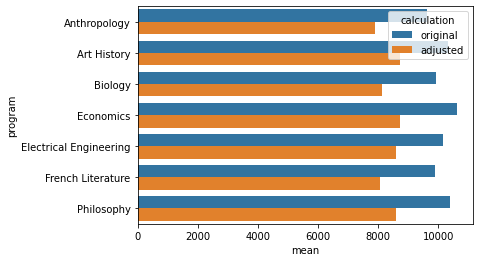

In [38]:
# ignore this ugly cod
original_summary = utilities.multiple_describe(data, 'program', 'earnings_change')
adjusted_summary = utilities.multiple_describe(data, 'program', 'trend_adjusted_change')
original_summary['calculation'] = "original"
adjusted_summary['calculation'] = "adjusted"

sns.barplot(x="mean", y="program", hue="calculation", data=pd.concat([original_summary, adjusted_summary]))

__Calculate earnings premium - VERY fancy way__

In [39]:
premium = metrics.Earnings_Premium(data, 'state_fips', 'education_level', 'earnings_start', 'earnings_end', 'program_start', 'program_end', 'age')

/Users/mattlerner/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [40]:
data['predicted_wage'] = premium.predicted_wage
data['earnings_premium'] = premium.full_premium

In [41]:
data.sample(5)

,Unnamed: 0,race,gender,earnings_start,earnings_end,age,program,program_start,program_end,education_level,...,end_month,earnings_end_adjusted,earnings_change,year_month_entry,year_month_exit,macro_wage_change,state_fips,trend_adjusted_change,predicted_wage,earnings_premium
7276,7277,Martian,Moman,23995.000,40805.000,58,Economics,2014,2017,123,...,5,41800.496,16810.000,2014-08,2017-05,1701.440,48,15108.560,20681.399,20123.601
8177,8178,Martian,Wan,35046.000,45458.000,18,Art History,2011,2014,124,...,6,48220.722,10412.000,2011-09,2014-06,1879.280,35,8532.720,46756.156,-1298.156
9318,9319,Venusian,Moman,28312.000,42182.000,55,Art History,2016,2018,125,...,7,42182.000,13870.000,2016-10,2018-07,2241.720,48,11628.280,26024.861,16157.139
3762,3763,Venusian,Moman,44986.000,53098.000,26,Economics,2012,2014,81,...,6,56325.045,8112.000,2012-10,2014-06,2380.040,06,5731.960,52930.737,167.263
8366,8367,Martian,Moman,29849.000,39043.000,35,Economics,2013,2014,124,...,5,41415.849,9194.000,2013-08,2014-05,252.720,12,8941.280,31030.097,8012.903


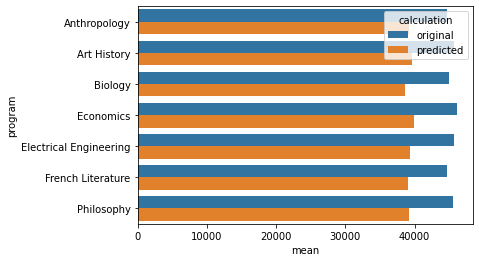

In [42]:
# Mean predicted vs actual wage by program
original_summary = utilities.multiple_describe(data, 'program', 'earnings_end')
adjusted_summary = utilities.multiple_describe(data, 'program', 'predicted_wage')
original_summary['calculation'] = "original"
adjusted_summary['calculation'] = "predicted"

sns.barplot(x="mean", y="program", hue="calculation", data=pd.concat([original_summary, adjusted_summary]))

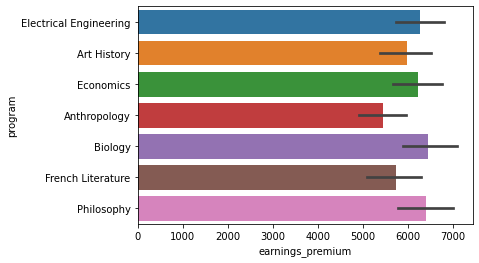

In [43]:
sns.barplot(x="earnings_premium", y="program", data=data, estimator=np.mean)

__Calculate employment premium__

In [44]:
data

,Unnamed: 0,race,gender,earnings_start,earnings_end,age,program,program_start,program_end,education_level,...,end_month,earnings_end_adjusted,earnings_change,year_month_entry,year_month_exit,macro_wage_change,state_fips,trend_adjusted_change,predicted_wage,earnings_premium
0,1,Martian,Wan,26340.000,37403.000,18,Electrical Engineering,2014,2016,0,...,5,39134.876,11063.000,2014-10,2016-05,2525.120,34,8537.880,33129.647,4273.353
1,2,Martian,Wan,27562.000,37011.000,43,Electrical Engineering,2015,2017,0,...,6,37913.936,9449.000,2015-09,2017-06,1596.400,25,7852.600,29168.798,7842.202
2,3,Martian,Wan,26641.000,36806.000,57,Electrical Engineering,2013,2013,0,...,5,39673.618,10165.000,2013-09,2013-05,-1340.040,51,11505.040,26641.000,10165.000
3,4,Martian,Wan,25812.000,37242.000,33,Electrical Engineering,2010,2011,0,...,6,41576.535,11430.000,2010-09,2011-06,572.000,36,10858.000,27542.655,9699.345
4,5,Martian,Wan,25581.000,37408.000,47,Electrical Engineering,2011,2012,0,...,5,40913.638,11827.000,2011-10,2012-05,-705.120,08,12532.120,25867.413,11540.587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10173,10174,Neptunian,Moman,26840.000,32819.000,20,Philosophy,2015,2019,125,...,5,nan,5979.000,2015-09,2019-05,4041.440,01,1937.560,37922.562,-5103.562
10174,10175,Neptunian,Moman,16577.000,69527.000,47,Philosophy,2015,2019,125,...,6,nan,52950.000,2015-09,2019-06,4783.480,48,48166.520,16279.492,53247.508
10175,10176,Neptunian,Moman,nan,28739.000,60,Philosophy,2018,2020,125,...,7,nan,nan,2018-08,2020-07,nan,48,nan,nan,nan
10176,10177,Neptunian,Moman,nan,39994.000,55,Philosophy,2016,2018,125,...,6,39994.000,nan,2016-09,2018-06,1187.160,51,nan,nan,nan


__Calculate time to completion and completion rate statistics__

In [45]:
completion = metrics.Completion(data, 'program', 'program_start', 'program_end', 'employed_at_end')

In [46]:
completion_time = completion.time_to_completion
completion_time

,program,n,mean,median,sd,min,max
0,Anthropology,1494,2.327,2,1.670,0,8
1,Art History,1444,2.391,2,1.669,0,9
2,Biology,1358,2.323,2,1.666,0,9
3,Economics,1451,2.378,2,1.608,0,8
4,Electrical Engineering,1495,2.282,2,1.662,0,8
5,French Literature,1387,2.373,2,1.647,0,10
6,Philosophy,1549,2.299,2,1.658,0,8


In [47]:
completion_rate = completion.completion_rates
completion_rate

,program,n,mean,median,sd,min,max
0,Anthropology,1494,0.898,1,0.303,0,1
1,Art History,1444,0.925,1,0.263,0,1
2,Biology,1358,0.908,1,0.289,0,1
3,Economics,1451,0.905,1,0.293,0,1
4,Electrical Engineering,1495,0.906,1,0.292,0,1
5,French Literature,1387,0.898,1,0.302,0,1
6,Philosophy,1549,0.912,1,0.283,0,1


Text(0.5, 1.0, 'Average time to complete')

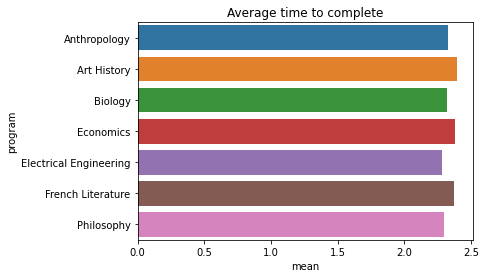

In [48]:
sns.barplot(x="mean", y="program", data=completion_time).set_title("Average time to complete")

Text(0.5, 1.0, 'Average completion rate')

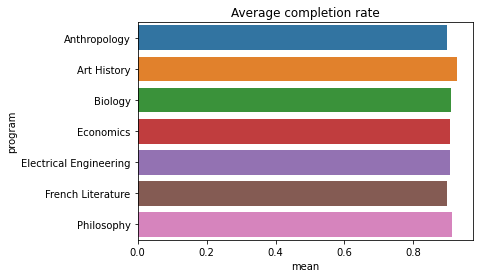

In [49]:
sns.barplot(x="mean", y="program", data=completion_rate).set_title("Average completion rate")

__Try out loan amounts__

In [50]:
data_programs = data.merge(programs, left_on="program", right_on="programs", how="left")
data_programs['total_cost'] = data_programs['cost_per_semester'] * data_programs['length']
data_programs['period_payment'] = cost.Compound_Interest_Loan.calculate_period_payment(data_programs['total_cost'], 0.05, 10)

In [51]:
data_programs.sample(10)

,Unnamed: 0_x,race,gender,earnings_start,earnings_end,age,program,program_start,program_end,education_level,...,predicted_wage,earnings_premium,time_to_completion,Unnamed: 0_y,programs,degree,length,cost_per_semester,total_cost,period_payment
8848,8849,Neptunian,Moman,36247.000,38656.000,44,French Literature,2011,2013,124,...,36657.232,1998.768,2,6,French Literature,MA,5,6000,30000,3885.137
2232,2233,Neptunian,Wan,42329.000,55371.000,30,Electrical Engineering,2011,2012,73,...,45490.270,9880.730,1,1,Electrical Engineering,BA,8,5000,40000,5180.183
8260,8261,Venusian,Moman,33059.000,45206.000,18,Art History,2012,2015,124,...,44105.226,1100.774,3,2,Art History,BA,8,7000,56000,7252.256
2628,2629,Neptunian,Moman,41839.000,54005.000,33,Economics,2013,2015,73,...,47253.780,6751.220,2,3,Economics,MA,4,10000,40000,5180.183
3853,3854,Venusian,Wan,34488.000,46427.000,18,Anthropology,2015,2016,81,...,38565.278,7861.722,1,4,Anthropology,BA,4,4500,18000,2331.082
9422,9423,Earthling,Wan,38803.000,48819.000,18,Economics,2015,2019,125,...,56063.646,-7244.646,4,3,Economics,MA,4,10000,40000,5180.183
3593,3594,Neptunian,Wan,30260.000,44765.000,21,Art History,2018,2019,81,...,33475.270,11289.730,1,2,Art History,BA,8,7000,56000,7252.256
7325,7326,Neptunian,Moman,25656.000,31938.000,28,Economics,2014,2017,123,...,31324.791,613.209,3,3,Economics,MA,4,10000,40000,5180.183
613,614,Martian,Moman,31377.000,50197.000,34,Biology,2011,2014,0,...,37688.337,12508.663,3,5,Biology,AS,3,3000,9000,1165.541
9328,9329,Earthling,Moman,34148.000,42319.000,19,Art History,2012,2015,125,...,44927.440,-2608.440,3,2,Art History,BA,8,7000,56000,7252.256


In [52]:
data_programs['premium_with_payments'] = data_programs['earnings_premium'] - data_programs['period_payment']

In [53]:
summary_w_payments = utilities.multiple_describe(data_programs, 'program', 'premium_with_payments')

Text(0.5, 1.0, 'Return including loan payments')

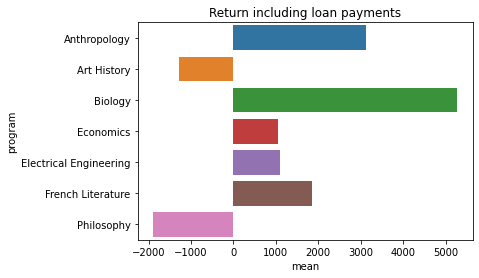

In [54]:
sns.barplot(x="mean", y="program", data=summary_w_payments).set_title("Return including loan payments")

__High school baselines__

In [55]:
cps = surveys.CPS_Ops()

/Users/mattlerner/roi/sbir-roi/roi/utilities.py:131: UserWarning: State codes, though integers, should be passed as strings. Something else was passed. Attempting to coerce to string.
  warnings.warn("State codes, though integers, should be passed as strings. Something else was passed. Attempting to coerce to string.")


In [57]:
cps.rudimentary_hs_baseline('08', [1, 5, 10])

[15017.630256967966, 21688.246894625805, 34336.28062777556]

In [ ]:
{'year1': 15017.630256967966,
 'year5': 21688.246894625805,
 'year10': 34336.28062777556}

In [ ]:
states = ['08','02','48','42']
baselines = pd.DataFrame([dict(cps.rudimentary_hs_baseline(state), **{"state":state}) for state in states])

In [ ]:
baselines

In [ ]:
sns.lineplot(data=baselines, x="year", y="passengers")